# 多项式回归 

In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

## 1、生成数据集 

In [2]:
max_degree = 20 #最大19阶
n_train,n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5,1.2,-3.4,5.6]) #只用了3阶，其余阶系数为0

features = np.random.normal(size=(n_train+n_test,1)) #按照高斯分布生成特征值200个
np.random.shuffle(features)

poly_features = np.power(features,np.arange(max_degree).reshape(1,-1))#实现了x的不同次方
for i in range(max_degree):
    poly_features[:,i] /= math.gamma(i+1)

labels = np.dot(poly_features,true_w)
labels += np.random.normal(scale=0.1,size=labels.shape)

features.shape,labels.shape


((200, 1), (200,))

In [3]:
true_w,features,poly_features,labels = [torch.tensor(x,dtype=torch.float32) for x in [true_w,features,poly_features,labels]]

In [4]:
features[:2],poly_features[:2],labels[:2]

(tensor([[2.5969],
         [0.8771]]),
 tensor([[1.0000e+00, 2.5969e+00, 3.3720e+00, 2.9189e+00, 1.8951e+00, 9.8427e-01,
          4.2601e-01, 1.5805e-01, 5.1304e-02, 1.4804e-02, 3.8444e-03, 9.0760e-04,
          1.9641e-04, 3.9236e-05, 7.2781e-06, 1.2600e-06, 2.0451e-07, 3.1242e-08,
          4.5074e-09, 6.1607e-10],
         [1.0000e+00, 8.7707e-01, 3.8462e-01, 1.1245e-01, 2.4656e-02, 4.3249e-03,
          6.3221e-04, 7.9213e-05, 8.6843e-06, 8.4630e-07, 7.4226e-08, 5.9183e-09,
          4.3256e-10, 2.9184e-11, 1.8283e-12, 1.0690e-13, 5.8600e-15, 3.0233e-16,
          1.4731e-17, 6.8001e-19]]),
 tensor([13.0536,  5.4117]))

## 2、训练测试

In [5]:
def train(train_features,test_features,train_labels,test_labels,num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape,1,bias=False))
    batch_size = min(10,train_labels.shape[0])
    
    train_iter = d2l.load_array((train_features,train_labels.reshape(-1,1)),batch_size)
    test_iter = d2l.load_array((test_features,test_labels.reshape(-1,1)),batch_size,is_train=False)
    
    trainer = torch.optim.SGD(net.parameters(),lr=0.01)
    animator = d2l.Animator(xlabel='epoch',ylabel='loss',yscale='log',xlim=[1,num_epochs],ylim=[1e-3,1e2],legend=['train','test'])
    
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net,train_iter,loss,trainer)
        if epoch == 0 or (epoch +1)%20 ==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    
    print('weight:',net[0].weight.data.numpy())    

weight: [[ 4.966636   1.1962503 -3.3804088  5.595364 ]]


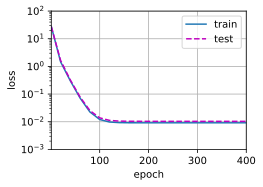

In [6]:
train(poly_features[:n_train,:4],poly_features[n_train:,:4],labels[:n_train],labels[n_train:])

weight: [[3.1292205 5.0639524]]


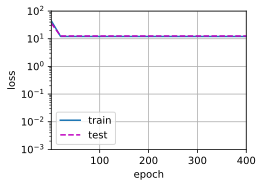

In [7]:
train(poly_features[:n_train,:2],poly_features[n_train:,:2],labels[:n_train],labels[n_train:])

weight: [[ 4.927626    1.279766   -3.2200525   5.224752   -0.37414855  0.95226604
  -0.17592609 -0.04282853 -0.18078187  0.16470623  0.01229204 -0.0494351
   0.12939778  0.03601089 -0.02500746 -0.12446651  0.04108487  0.1430809
  -0.07607475  0.22228222]]


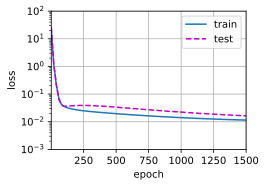

In [8]:
train(poly_features[:n_train],poly_features[n_train:],labels[:n_train],labels[n_train:],num_epochs=1500)